In [74]:
import numpy as np
import util
import matplotlib.pyplot as plt


class PoissonRegression:
    """Poisson Regression.

    Example usage:
        > clf = PoissonRegression(step_size=lr)
        > clf.fit(x_train, y_train)
        > clf.predict(x_eval)
    """

    def __init__(self, step_size=1e-5, max_iter=10000000, eps=1e-10,
                 theta_0=None, verbose=True):
        """
        Args:
            step_size: Step size for iterative solvers only.
            max_iter: Maximum number of iterations for the solver.
            eps: Threshold for determining convergence.
            theta_0: Initial guess for theta. If None, use the zero vector.
            verbose: Print loss values during training.
        """
        self.theta = theta_0
        self.step_size = step_size
        self.max_iter = max_iter
        self.eps = eps
        self.verbose = verbose
        
    def hyp(self, x):
        return np.exp(self.theta.dot(x.T))
    
    
    def fit(self, x, y):
        """Run gradient ascent to maximize likelihood for Poisson regression.

        Args:
            x: Training example inputs. Shape (n_examples, dim).
            y: Training example labels. Shape (n_examples,).
        """
        # *** START CODE HERE ***
        n = len(x) # n
        d = len(x[0]) # number of features/parameters
        self.theta = np.zeros((1, d))
        theta = np.array([100 for i in range(d)])
        i = 0
        eta = 0.01
        while i < self.max_iter and (abs(theta - self.theta) > self.eps).all():
            theta = self.theta
            grad = (1/n)*np.subtract(y.T, self.hyp(x)).dot(x)
            self.theta = self.theta + self.step_size*grad
            i += 1
        # *** END CODE HERE ***

    def predict(self, x):
        """Make a prediction given inputs x.

        Args:
            x: Inputs of shape (n_examples, dim).

        Returns:
            Floating-point prediction for each input, shape (n_examples,).
        """
        # *** START CODE HERE ***
        return self.hyp(x)
        # *** END CODE HERE ***

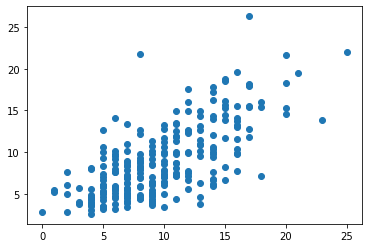

In [79]:
def main(lr, train_path, eval_path, save_path):
    """Problem: Poisson regression with gradient ascent.

    Args:
        lr: Learning rate for gradient ascent.
        train_path: Path to CSV file containing dataset for training.
        eval_path: Path to CSV file containing dataset for evaluation.
        save_path: Path to save predictions.
    """
    # Load training set
    x_train, y_train = util.load_dataset(train_path, add_intercept=True)
    y_train = np.array(y_train).reshape(-1,1)
    # *** START CODE HERE ***
    # Fit a Poisson Regression model
    clf = PoissonRegression()
    clf.fit(x_train, y_train)
    
    # Run on the validation set, and use np.savetxt to save outputs to save_path
    x, y = util.load_dataset(eval_path, add_intercept=True)
    y = np.array(y).reshape(-1,1)
    y_pred = clf.predict(x)
    plt.scatter(y, y_pred)
    plt.show()
    np.savetxt(save_path, y_pred)
    # *** END CODE HERE ***
    
if __name__ == '__main__':
    main(lr=1e-5,
        train_path='train.csv',
        eval_path='valid.csv',
        save_path='poisson_pred.txt')
